In [1]:
import numpy
import pandas
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
data = pandas.read_csv("C:/Users/Om SaiRam/Desktop/PANDAS Tuto/project 4/spam_ham_dataset/spamham_dataset.csv")

In [3]:
data.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [4]:
data.shape

(5171, 4)

In [5]:
# 1 Data Cleaning
# 2 EDA 
# 3 Text preprocessing
# 4 Model Building
# 5 Evalution
# 6 Improvement
# 7 website 
# 8 Deploy

# 1 Data Cleaning

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [7]:
# drop column
data.drop(columns = ['Unnamed: 0','label_num'], inplace= True)

In [8]:
# renaming cols
data.rename(columns ={'label' : 'Target', 'text' : 'Text'}, inplace= True)
data.head()

,Target,Text
0,ham,Subject: enron methanol ; meter # : 988291\r\n...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,spam,"Subject: photoshop , windows , office . cheap ..."
4,ham,Subject: re : indian springs\r\nthis deal is t...


In [9]:
#Label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [10]:
data['Target'] = le.fit_transform(data['Target'])

In [11]:
data.head()

,Target,Text
0,0,Subject: enron methanol ; meter # : 988291\r\n...
1,0,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,0,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,1,"Subject: photoshop , windows , office . cheap ..."
4,0,Subject: re : indian springs\r\nthis deal is t...


In [12]:
# check Missing Values
data.isnull().sum()

Target    0
Text      0
dtype: int64

In [13]:
# Check Duplicate Values
data.duplicated().sum()

178

In [14]:
# Remove Duplicate Values
data = data.drop_duplicates(keep= 'first')

In [15]:
data.shape

(4993, 2)

# 2. EDA

In [16]:
data.head()

,Target,Text
0,0,Subject: enron methanol ; meter # : 988291\r\n...
1,0,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,0,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,1,"Subject: photoshop , windows , office . cheap ..."
4,0,Subject: re : indian springs\r\nthis deal is t...


In [17]:
data['Target'].value_counts()

0    3531
1    1462
Name: Target, dtype: int64

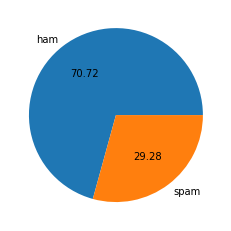

In [18]:
import matplotlib.pyplot as plt
plt.pie(data['Target'].value_counts(), labels= ['ham','spam'], autopct= "%0.2f")
plt.show()

In [19]:
# Data is Imbalanced

In [20]:
#for deeper understanding creating columns according to no of char, no of words, no of sentences in emails
import nltk

In [21]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Om
[nltk_data]     SaiRam\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
#num of cgar
data['num_characters'] = data['Text'].apply(len)

In [23]:
data.head()

,Target,Text,num_characters
0,0,Subject: enron methanol ; meter # : 988291\r\n...,327
1,0,"Subject: hpl nom for january 9 , 2001\r\n( see...",97
2,0,"Subject: neon retreat\r\nho ho ho , we ' re ar...",2524
3,1,"Subject: photoshop , windows , office . cheap ...",414
4,0,Subject: re : indian springs\r\nthis deal is t...,336


In [24]:
# num of words
data['num_words'] = data['Text'].apply (lambda x:len(nltk.word_tokenize(x)))
data.head()

,Target,Text,num_characters,num_words
0,0,Subject: enron methanol ; meter # : 988291\r\n...,327,68
1,0,"Subject: hpl nom for january 9 , 2001\r\n( see...",97,24
2,0,"Subject: neon retreat\r\nho ho ho , we ' re ar...",2524,551
3,1,"Subject: photoshop , windows , office . cheap ...",414,49
4,0,Subject: re : indian springs\r\nthis deal is t...,336,71


In [25]:
# num of sentences
data['num_sentences'] = data['Text'].apply (lambda x:len(nltk.sent_tokenize(x)))
data.head()

,Target,Text,num_characters,num_words,num_sentences
0,0,Subject: enron methanol ; meter # : 988291\r\n...,327,68,3
1,0,"Subject: hpl nom for january 9 , 2001\r\n( see...",97,24,3
2,0,"Subject: neon retreat\r\nho ho ho , we ' re ar...",2524,551,24
3,1,"Subject: photoshop , windows , office . cheap ...",414,49,3
4,0,Subject: re : indian springs\r\nthis deal is t...,336,71,3


In [26]:
data[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4993.000000,4993.000000,4993.000000
mean,1069.426397,233.678149,13.386942
std,1547.863387,340.702932,27.959959
min,11.000000,2.000000,1.000000
25%,256.000000,55.000000,4.000000
50%,557.000000,125.000000,7.000000
75%,1262.000000,288.000000,15.000000
max,32258.000000,8863.000000,1204.000000


In [27]:
#ham
data[data['Target']== 0][['num_characters','num_words','num_sentences']].describe() 

,num_characters,num_words,num_sentences
count,3531.000000,3531.000000,3531.000000
mean,994.939394,230.516001,11.662419
std,1402.785831,337.018933,25.330035
min,18.000000,3.000000,1.000000
25%,241.000000,53.000000,4.000000
50%,538.000000,128.000000,7.000000
75%,1253.500000,298.500000,13.500000
max,32258.000000,8863.000000,1204.000000


In [28]:
#Spam
data[data['Target']== 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,1462.000000,1462.000000,1462.000000
mean,1249.326265,241.315321,17.551984
std,1840.112883,349.439381,33.111447
min,11.000000,2.000000,1.000000
25%,304.250000,60.000000,4.000000
50%,589.000000,119.500000,9.000000
75%,1305.000000,252.750000,19.000000
max,22073.000000,3963.000000,693.000000


In [29]:
#plot Histogram
import seaborn as sns

<AxesSubplot: xlabel='num_characters', ylabel='Count'>

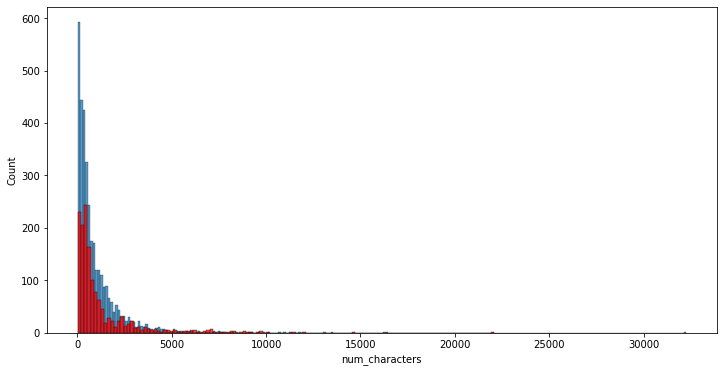

In [30]:
plt.figure(figsize=(12,6))
sns.histplot(data[data['Target']==0]['num_characters'])
sns.histplot(data[data['Target']==1]['num_characters'],color='red')

<AxesSubplot: xlabel='num_words', ylabel='Count'>

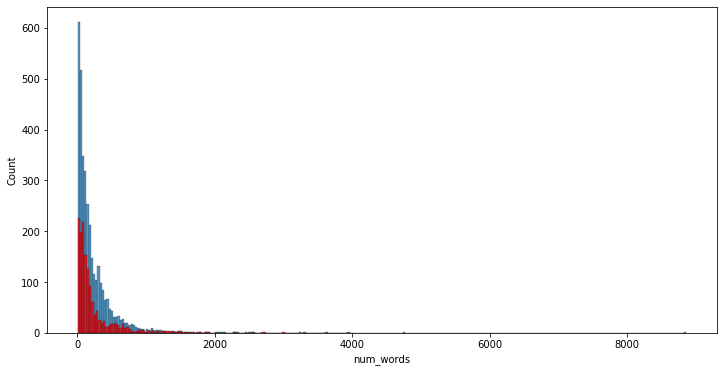

In [31]:
plt.figure(figsize=(12,6))
sns.histplot(data[data['Target']==0]['num_words'])
sns.histplot(data[data['Target']==1]['num_words'],color='red')

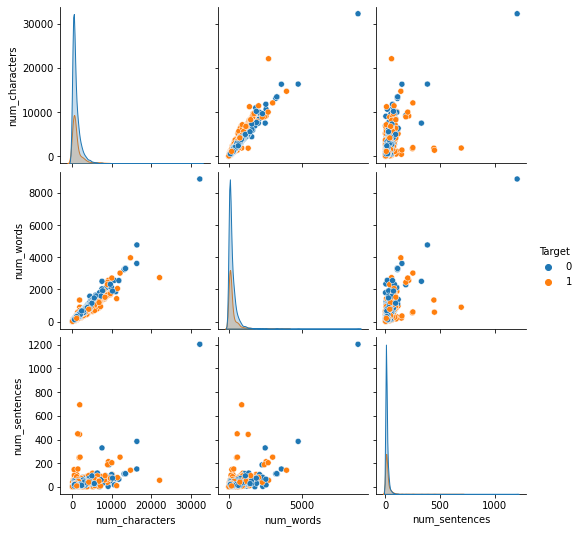

In [32]:
# Correlation
sns.pairplot(data,hue= 'Target')

C:\Users\Om SaiRam\AppData\Local\Temp\ipykernel_9576\2593810800.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot= True)


<AxesSubplot: >

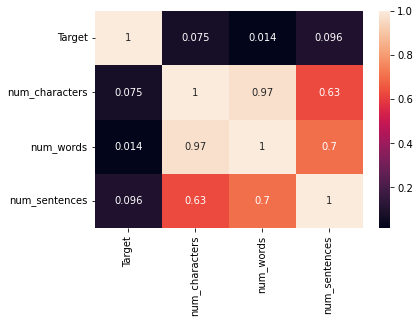

In [33]:
sns.heatmap(data.corr(),annot= True)

# # Data(Text) Preprocessing
# Lower Case
# Tokenization
# Removing Special Character
# Removing Stop words and punctuality
# stemming


In [34]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [35]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [36]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [39]:
transform_text('hpl nom for january 9 , 2001\r\n( see attached file : hplnol 09 . xls )\r\n- hplnol 09 . xls')

'hpl nom januari 9 2001 see attach file hplnol 09 xl hplnol 09 xl'

In [40]:
data['Text'][1]

'Subject: hpl nom for january 9 , 2001\r\n( see attached file : hplnol 09 . xls )\r\n- hplnol 09 . xls'

In [38]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('Loving')

'love'

In [41]:
data['transform_text'] = data['Text'].apply(transform_text)

In [42]:
data.head()

,Target,Text,num_characters,num_words,num_sentences,transform_text
0,0,Subject: enron methanol ; meter # : 988291\r\n...,327,68,3,subject enron methanol meter 988291 follow not...
1,0,"Subject: hpl nom for january 9 , 2001\r\n( see...",97,24,3,subject hpl nom januari 9 2001 see attach file...
2,0,"Subject: neon retreat\r\nho ho ho , we ' re ar...",2524,551,24,subject neon retreat ho ho ho around wonder ti...
3,1,"Subject: photoshop , windows , office . cheap ...",414,49,3,subject photoshop window offic cheap main tren...
4,0,Subject: re : indian springs\r\nthis deal is t...,336,71,3,subject indian spring deal book teco pvr reven...


In [43]:
#generate word cloud to show some words bigger in ham and spam

from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color= 'white')

In [44]:
spam_wc = wc.generate(data[data['Target'] == 1]['transform_text'].str.cat(sep = " "))

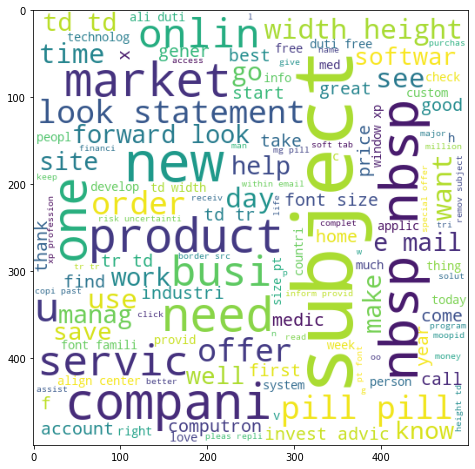

In [45]:
plt.figure(figsize=(12,8))
plt.imshow(spam_wc)

In [46]:
ham_wc = wc.generate(data[data['Target'] == 0]['transform_text'].str.cat(sep = " "))

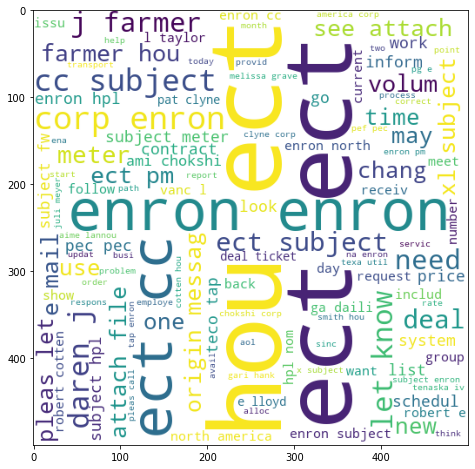

In [47]:
plt.figure(figsize=(12,8))
plt.imshow(spam_wc)

In [48]:
data.head()

,Target,Text,num_characters,num_words,num_sentences,transform_text
0,0,Subject: enron methanol ; meter # : 988291\r\n...,327,68,3,subject enron methanol meter 988291 follow not...
1,0,"Subject: hpl nom for january 9 , 2001\r\n( see...",97,24,3,subject hpl nom januari 9 2001 see attach file...
2,0,"Subject: neon retreat\r\nho ho ho , we ' re ar...",2524,551,24,subject neon retreat ho ho ho around wonder ti...
3,1,"Subject: photoshop , windows , office . cheap ...",414,49,3,subject photoshop window offic cheap main tren...
4,0,Subject: re : indian springs\r\nthis deal is t...,336,71,3,subject indian spring deal book teco pvr reven...


In [49]:
# top 30 words which we have used in data of spam and ham
spam_corpus = []
for msg in data[data['Target']== 1]['transform_text'].tolist():
    for words in msg.split():
        spam_corpus.append(words)
    

In [50]:
spam_corpus

['subject',
 'photoshop',
 'window',
 'offic',
 'cheap',
 'main',
 'trend',
 'abas',
 'darer',
 'prudent',
 'fortuit',
 'undergon',
 'lightheart',
 'charm',
 'orinoco',
 'taster',
 'railroad',
 'affluent',
 'pornograph',
 'cuvier',
 'irvin',
 'parkhous',
 'blameworthi',
 'chlorophyl',
 'robe',
 'diagrammat',
 'fogarti',
 'clear',
 'bayda',
 'inconvenienc',
 'manag',
 'repres',
 'smart',
 'hashish',
 'academi',
 'sharehold',
 'unload',
 'bad',
 'danielson',
 'pure',
 'caffein',
 'spaniard',
 'chargeabl',
 'levin',
 'subject',
 'look',
 'medic',
 'best',
 'sourc',
 'difficult',
 'make',
 'materi',
 'condit',
 'better',
 'best',
 'law',
 'easi',
 'enough',
 'ruin',
 'bad',
 'law',
 'excus',
 'found',
 'best',
 'simpliest',
 'site',
 'medic',
 'net',
 'perscript',
 'easi',
 'deliveri',
 'privat',
 'secur',
 'easi',
 'better',
 'see',
 'rightli',
 'pound',
 'week',
 'squint',
 'million',
 'got',
 'anyth',
 'ever',
 'want',
 'erect',
 'treatment',
 'pill',
 'anti',
 'depress',
 'pill',
 'wei

In [51]:
len(spam_corpus)

196592

In [52]:
import pandas as pd 

In [53]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))[0]

0       subject
1             3
2           com
3          http
4       compani
5             2
6         price
7             1
8             0
9             e
10          www
11       inform
12           00
13          get
14         font
15        email
16            5
17           td
18        pleas
19        secur
20    statement
21            4
22       invest
23        stock
24           us
25      product
26            7
27         time
28          new
29          may
Name: 0, dtype: object

In [54]:
    pd.DataFrame(Counter(spam_corpus).most_common(30))[1]

0     1622
1     1229
2      989
3      981
4      918
5      853
6      731
7      710
8      688
9      632
10     586
11     553
12     550
13     547
14     515
15     509
16     506
17     504
18     503
19     499
20     497
21     493
22     473
23     467
24     466
25     459
26     451
27     448
28     427
29     421
Name: 1, dtype: int64

In [55]:
ham_corpus = []
for msg in data[data['Target']== 0]['transform_text'].tolist():
    for words in msg.split():
        ham_corpus.append(words)
    

In [56]:
len(ham_corpus)

380475

In [57]:
from collections import Counter
pd.DataFrame(Counter(ham_corpus).most_common(30))[0]

0         ect
1         hou
2       enron
3     subject
4        2000
5        deal
6          ga
7         com
8       meter
9       pleas
10         cc
11        hpl
12         pm
13      thank
14       2001
15          1
16        000
17      daren
18         00
19         10
20         01
21       need
22          3
23       corp
24      volum
25    forward
26          2
27       know
28      mmbtu
29          e
Name: 0, dtype: object

In [58]:
pd.DataFrame(Counter(ham_corpus).most_common(30))[1]

0     13690
1      7174
2      6442
3      6210
4      4209
5      3481
6      2784
7      2713
8      2709
9      2675
10     2324
11     2291
12     2283
13     2068
14     1988
15     1971
16     1854
17     1837
18     1795
19     1754
20     1701
21     1690
22     1663
23     1662
24     1645
25     1571
26     1504
27     1405
28     1396
29     1333
Name: 1, dtype: int64

## 4. Built Model

In [59]:
#Naive Bayes - on textual data it performs well
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [60]:
X = tfidf.fit_transform(data['transform_text']).toarray()

In [61]:
X.shape

(4993, 42592)

In [62]:
y = data['Target'].values

In [63]:
y

array([0, 0, 0, ..., 0, 0, 1])

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state= 2)

In [66]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [67]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [68]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.9409409409409409
[[669  28]
 [ 31 271]]
0.9063545150501672


In [69]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.908908908908909
[[696   1]
 [ 90 212]]
0.9953051643192489


In [70]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.8468468468468469
[[677  20]
 [133 169]]
0.8941798941798942


In [71]:
# tfidf and mnb we have used
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [72]:
svc = SVC(kernel= 'sigmoid',gamma= 0.1)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(C = 0.01, solver='liblinear',penalty = 'l1')
rfc = RandomForestClassifier(n_estimators=50,random_state = 2)
abc = AdaBoostClassifier(n_estimators=50,random_state = 2)
bc =  BaggingClassifier(n_estimators=50,random_state = 2)
etc = ExtraTreesClassifier(n_estimators=50,random_state = 2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state = 2)
xgb = XGBClassifier(n_estimators=50,random_state = 2)

In [73]:
clfs = {
        'SVC': svc,
        'KN' : knc,
        'NB' : mnb,
        'DT' : dtc,
        'LR' : lrc,
        'RF' : rfc,
        'AdaBoost' : abc,
        'Bgc' : bc,
        'ETC' : etc,
        'GBDT' : gbdt,
        'xgb' : xgb
        }

In [74]:
def train_classifier(clf, X_train,y_train,X_test,y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test, y_pred)
    
    return accuracy,precision

In [75]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.973973973973974, 0.9285714285714286)

In [76]:
acccuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf,X_train,y_train,X_test,y_test)
    
    print('For', name)
    print('Accuracy :', current_accuracy)
    print('Precision :', current_precision)
    
    acccuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For SVC
Accuracy : 0.973973973973974
Precision : 0.9285714285714286
For KN
Accuracy : 0.9579579579579579
Precision : 0.9676258992805755
For NB
Accuracy : 0.908908908908909
Precision : 0.9953051643192489
For DT
Accuracy : 0.8518518518518519
Precision : 0.8235294117647058


C:\Users\Om SaiRam\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For LR
Accuracy : 0.6976976976976977
Precision : 0.0
For RF
Accuracy : 0.975975975975976
Precision : 0.9512987012987013
For AdaBoost
Accuracy : 0.9479479479479479
Precision : 0.8955696202531646
For Bgc
Accuracy : 0.9529529529529529
Precision : 0.9047619047619048
For ETC
Accuracy : 0.97997997997998
Precision : 0.9519230769230769
For GBDT
Accuracy : 0.9279279279279279
Precision : 0.9197080291970803
For xgb
Accuracy : 0.968968968968969
Precision : 0.916923076923077


In [96]:
performance_data = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':acccuracy_scores,'Precision': precision_scores}).sort_values('Accuracy',ascending= False)

In [97]:
performance_data

,Algorithm,Accuracy,Precision
8,ETC,0.979980,0.951923
5,RF,0.975976,0.951299
0,SVC,0.973974,0.928571
10,xgb,0.968969,0.916923
1,KN,0.957958,0.967626
7,Bgc,0.952953,0.904762
6,AdaBoost,0.947948,0.895570
9,GBDT,0.927928,0.919708
2,NB,0.908909,0.995305
3,DT,0.851852,0.823529


In [98]:
performance_data1 = pd.melt(performance_data, id_vars='Algorithm')

In [99]:
performance_data1

,Algorithm,variable,value
0,ETC,Accuracy,0.979980
1,RF,Accuracy,0.975976
2,SVC,Accuracy,0.973974
3,xgb,Accuracy,0.968969
4,KN,Accuracy,0.957958
5,Bgc,Accuracy,0.952953
6,AdaBoost,Accuracy,0.947948
7,GBDT,Accuracy,0.927928
8,NB,Accuracy,0.908909
9,DT,Accuracy,0.851852


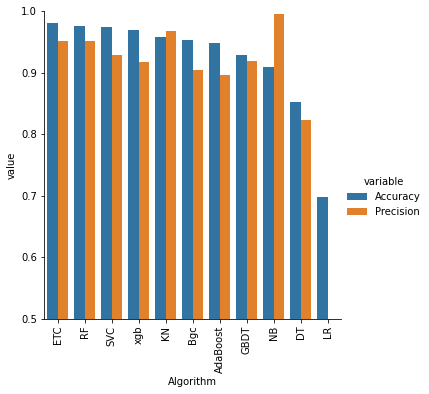

In [100]:
sns.catplot(x = 'Algorithm', y = 'value',
            hue = 'variable',data = performance_data1, kind = 'bar', height = 5)
plt.ylim(0.5,1.0)
plt.xticks(rotation = 'vertical')
plt.show()